In [2]:
# 자전거 대여 수요 예측(p.363)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df= pd.read_csv('../data/train.csv')
print(bike_df.shape)
bike_df.head()


(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# datetime컬럼은 datetime타입으로 변환
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)

# 연,월,일, 시간 추출
bike_df['year']=bike_df.datetime.apply(lambda x: x.year)
bike_df['month']=bike_df.datetime.apply(lambda x: x.month)
bike_df['day']=bike_df.datetime.apply(lambda x: x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x: x.hour)





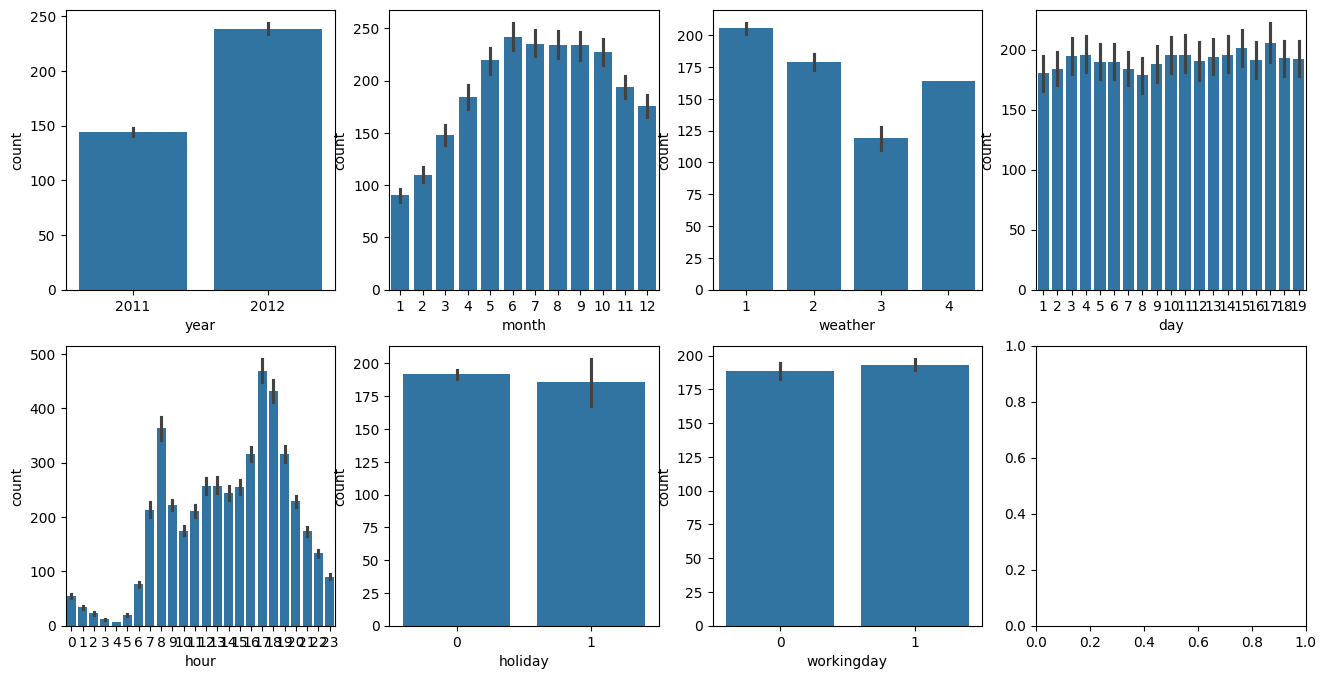

In [7]:
drop_columns= ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)
fig, axs= plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features= ['year', 'month', 'weather', 'day', 'hour', 'holiday', 'workingday']
for i, features in enumerate(cat_features):
    row=int(i/4)
    col=i%4
    sns.barplot(x=features, y='count', data=bike_df, ax=axs[row][col])

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# rmsle계산
def rmsle(y, pred):
    log_y= np.log1p(y)
    log_pred= np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmsle_val= rmsle(y, pred)
    rmse_val= rmse(y,pred)
    mae_val= mean_absolute_error(y,pred)
    print(rmsle_val, rmse_val, mae_val)

def rmsle(y, pred):
    msle= mean_squared_log_error(y, pred)
    rmsle= np.sqrt(mse)
    return rmsle
   

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

y_target= bike_df['count']
x_features= bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, Y_train, Y_test= train_test_split(x_features,y_target, test_size=.3,
                                                   random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, Y_train)
pred= lr_reg.predict(X_test)

evaluate_regr(Y_test, pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.